### Ethogram from JAABA .mat file

In [1]:
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
path = Path("/data/caitlin/training-vids/M235Slc17a7_Gtacr2/20170425/jaaba.mat")

In [23]:
trial_index = 69

m = loadmat(path)
behaviors = sorted([b.split('_')[0] for b in m['data'].dtype.names if 'scores' in b])

all_behaviors = [
    "Lift",
    "Handopen",
    "Grab",
    "Sup",
    "Atmouth",
    "Chew"
]

sorted_behaviors = [b for b in all_behaviors if b in behaviors]

ethograms = []

mat_trial_index = np.argwhere(m["data"]["trial"].ravel() == (trial_index + 1))
# Trial not found in JAABA data
if mat_trial_index.size == 0:
    raise

mat_trial_index = mat_trial_index.item()

for b in sorted_behaviors:
    behavior_index = m['data'].dtype.names.index(f'{b}_postprocessed')
    ethograms.append(m['data'][mat_trial_index][0][behavior_index])

sorted_behaviors = [b.lower() for b in sorted_behaviors]

ethogram = np.hstack(ethograms).T

<Axes: >

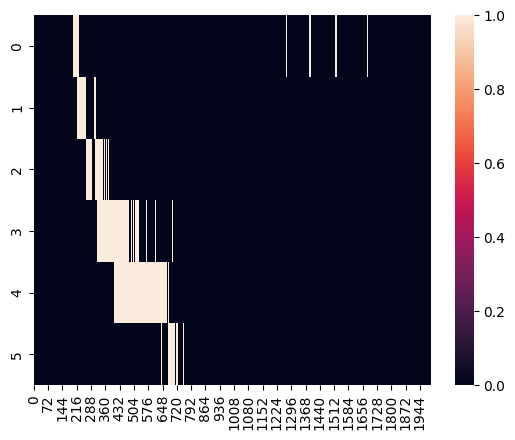

In [24]:
sns.heatmap(ethogram)